<a href="https://colab.research.google.com/github/asaphebraz/iec2023_2_turmas_a_b/blob/main/Projeto%20Final%20-%20IEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final - Introdução à Engenharia de Computação

Caro Professor Adriano,

Gostaria de compartilhar o meu projeto desenvolvido para a disciplina de Introdução à Engenharia de Computação. Este projeto integra três tecnologias fundamentais: Tinkercad, ThingSpeak e AppInventor, com o objetivo principal de monitorar a temperatura de um fogão de maneira interativa e informativa.

# Tinkercad
No Tinkercad, utilizei um circuito com Arduino, empregando diversos componentes para criar uma representação prática do monitoramento de temperatura de um fogão entre outras funcionalidades. Os componentes incluídos são: módulo WiFi (ESP8266), micro servo, multímetro, sensor de temperatura, potenciômetro, lâmpada e LED.

O potenciômetro desempenha um papel crucial no projeto, controlando o sensor de temperatura e guiando todas as operações. Ao girar o potenciômetro, três eventos ocorrem simultaneamente: a temperatura aumenta ou diminui, o micro servo gira e o multímetro começa a contabilizar a voltagem.

Quando a temperatura atinge 100ºC, a lâmpada se acende, indicando que o fogão atingiu uma temperatura elevada. Se a temperatura chegar a 250ºC, o LED acende, alertando sobre uma temperatura de risco.


---


# Imagem do circuito Arduino:
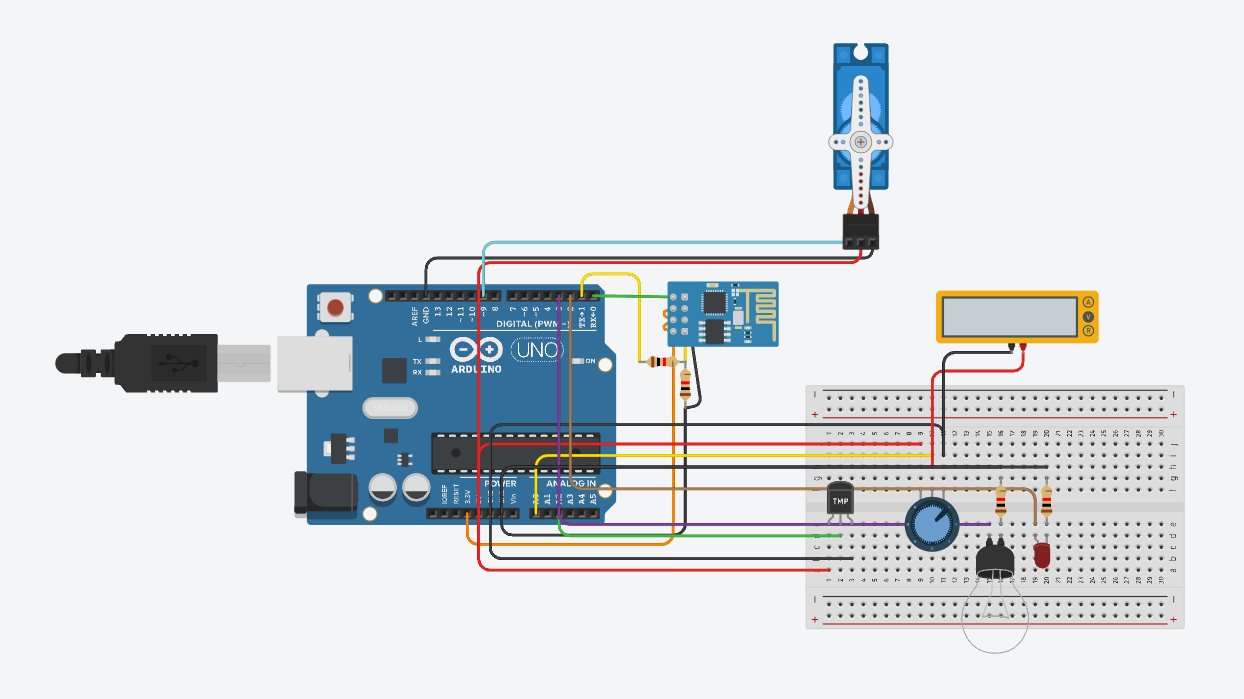

---

# Código arduino
Segue abaixo o código utilizado para o Arduino, responsável por controlar o circuito e enviar os dados de temperatura para o ThingSpeak:

```
#include <Servo.h>

Servo meuServo;

int potenciometroPin = A0;
int multimetroPin = A1;
int sensorTemperaturaPin = A2;
int ledPin = 2;  
int lampadaPin = 3;

String ssid = "Simulator Wifi";    // SSID to connect to
String password = "";               // Our virtual wifi has no password
String host = "api.thingspeak.com"; // ThingSpeak server
const int httpPort = 80;            // HTTP port for ThingSpeak
String uri = "/update?api_key=GSPBPVCFIQTQNRH7&field1=";

void setupESP8266() {
  Serial.begin(115200);
  delay(10);
  Serial.println("AT");
  delay(10);
  if (!Serial.find("OK")) {
    Serial.println("Failed to initialize ESP8266");
    while (1);
  }

  Serial.println("AT+CWJAP=\"" + ssid + "\",\"" + password + "\"");
  delay(10);
  if (!Serial.find("OK")) {
    Serial.println("Failed to connect to WiFi");
    while (1);
  }

  Serial.println("AT+CIPSTART=\"TCP\",\"" + host + "\"," + httpPort);
  delay(50);
  if (!Serial.find("OK")) {
    Serial.println("Failed to connect to ThingSpeak");
    while (1);
  }
}

void sendDataToThingSpeak(int temp) {
  String httpPacket = "GET " + uri + String(temp) + " HTTP/1.1\r\nHost: " + host + "\r\n\r\n";
  int length = httpPacket.length();

  Serial.print("AT+CIPSEND=");
  Serial.println(length);
  delay(10);

  Serial.print(httpPacket);
  // delay(10); // Remove or reduce this delay

  if (!Serial.find("SEND OK\r\n")) {
    Serial.println("Failed to send data to ThingSpeak");
  }
}

void setup() {
  meuServo.attach(9);
  pinMode(multimetroPin, OUTPUT);
  pinMode(ledPin, OUTPUT);
  pinMode(lampadaPin, OUTPUT);

  setupESP8266();
}

void loop() {
  int potValue = analogRead(potenciometroPin);
  int servoPos = map(potValue, 0, 1023, 0, 180);
  meuServo.write(servoPos);

  int multimetroValue = map(potValue, 0, 1023, 0, 255);
  analogWrite(multimetroPin, multimetroValue);

  int temperaturaMapped = map(potValue, 0, 1023, 0, 250);

  if (temperaturaMapped >= 100) {
    digitalWrite(lampadaPin, HIGH);
  } else {
    digitalWrite(lampadaPin, LOW);
  }

  if (temperaturaMapped == 250) {
    digitalWrite(ledPin, HIGH);
  } else {
    digitalWrite(ledPin, LOW);
  }

  sendDataToThingSpeak(temperaturaMapped);

}

```



# ThingSpeak
O projeto está integrado ao ThingSpeak, onde a temperatura é registrada e disponibilizada em um gráfico acessível. Este gráfico é crucial para monitorar a variação de temperatura do fogão ao longo do tempo.

*   API Key: GSPBPVCFIQTQNRH7
*   Link do gráfico: https://thingspeak.com/channels/2407964/charts/1


---
Exemplo de apresentação do gráfico:

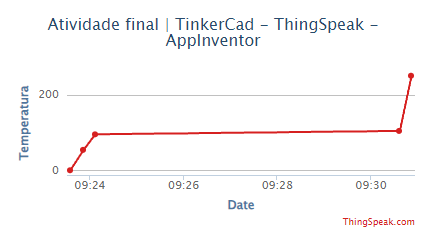

# AppInventor
No AppInventor, criei duas telas principais para uma experiência mais acessível e intuitiva:

**(1) Tela Inicial:**
*   Inclui a logo da UFG para identificação institucional.
*   Destaca as tecnologias utilizadas no projeto.
*   Apresenta uma descrição sucinta do aplicativo, proporcionando contexto ao usuário.
*   Contém um botão para acessar o gráfico de temperatura.
*   Oferece a opção de sair do aplicativo por meio de um botão dedicado.

**(2) Tela do Gráfico:**
*   Exibe um gráfico visual representativo das variações de temperatura ao longo do tempo.
*   Possui um botão para retornar à página inicial, facilitando a navegação do usuário.

# Apresentação do aplicativo
**Tela inicial**

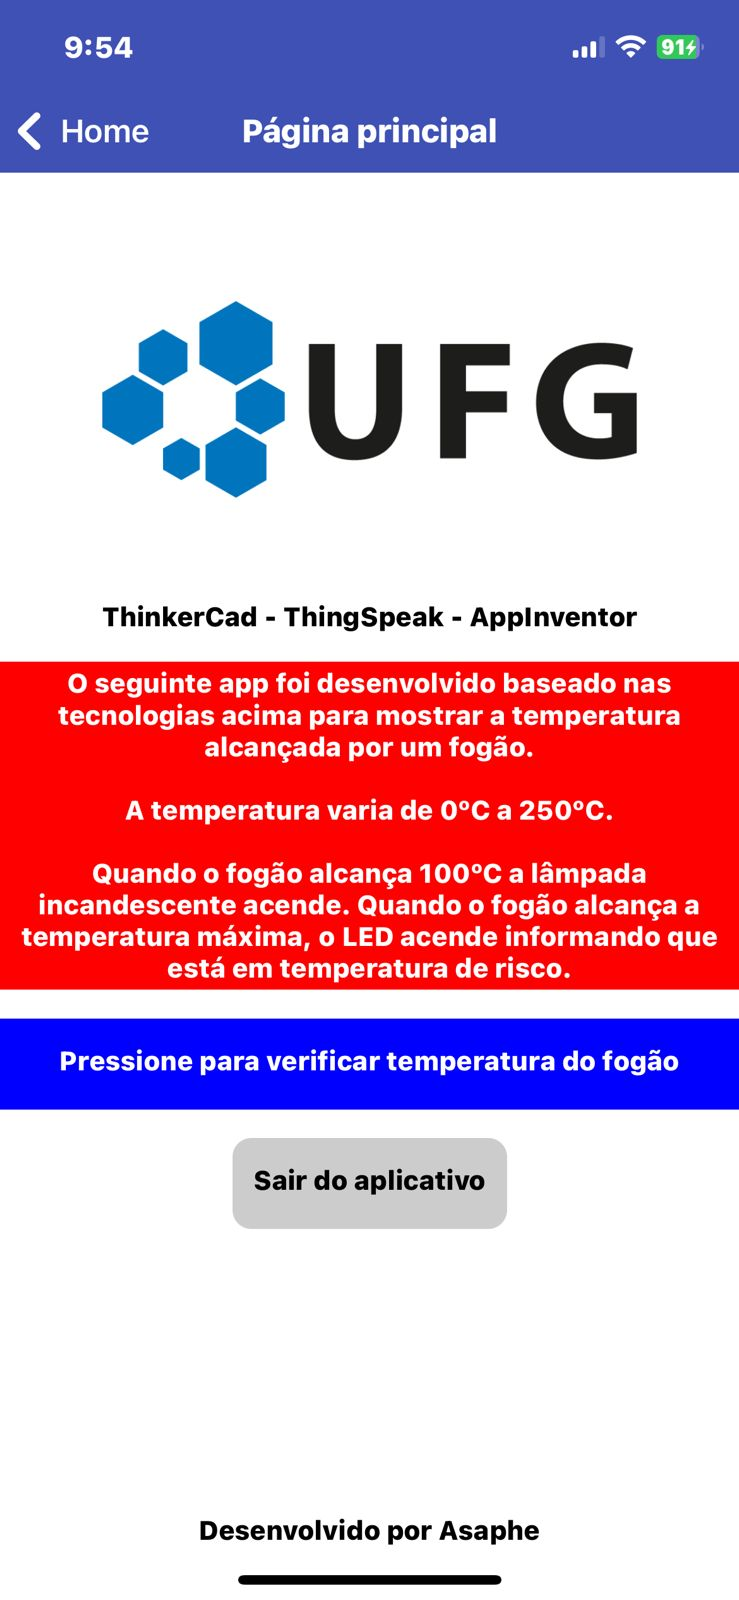


**Tela do gráfico**

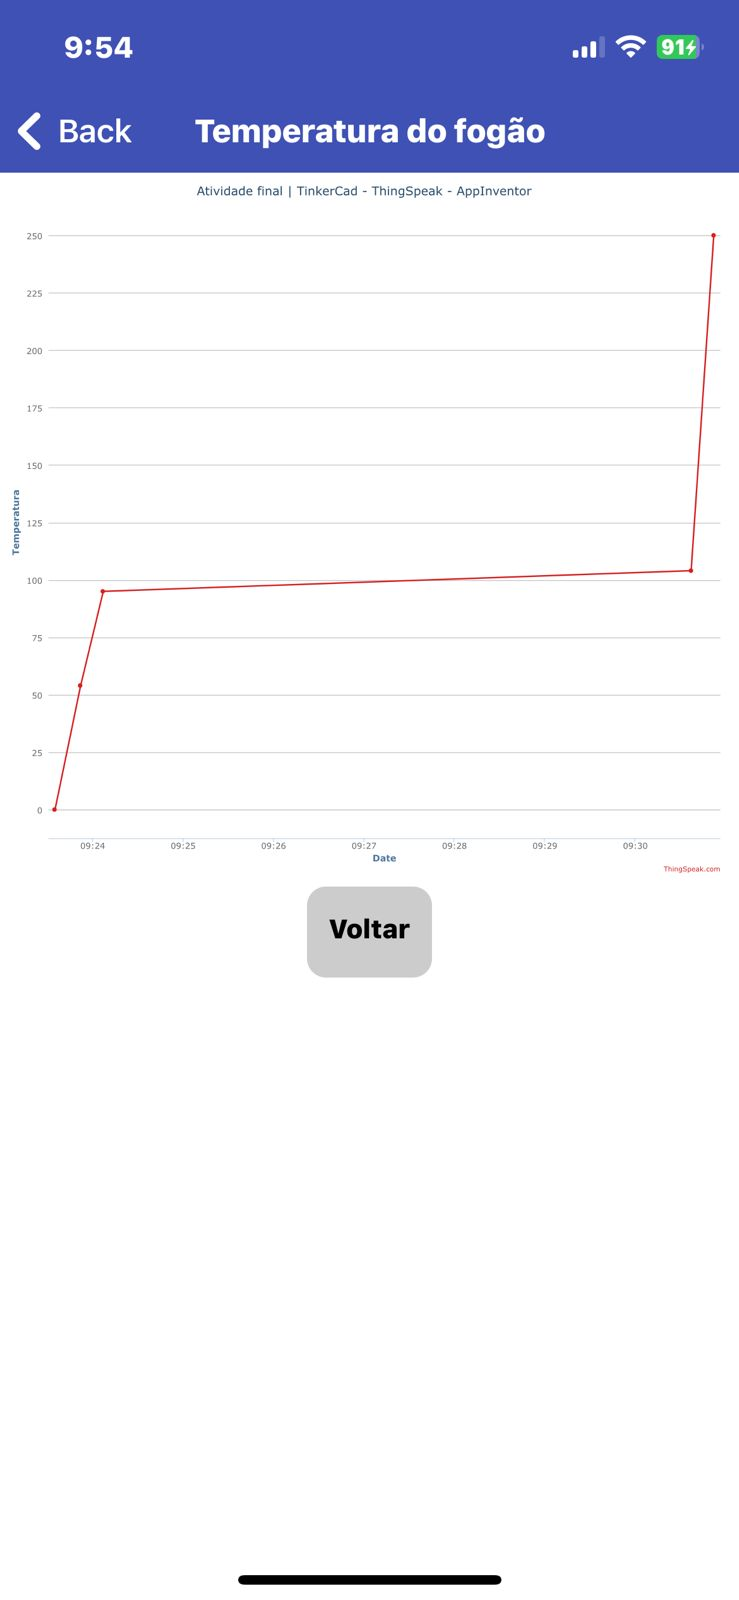


# FIM!